In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
!pip install tensorflow==2.16.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 41.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.2


# Data Collection & Preparation

### Import Image Datagenerator Library


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Configure ImageDataGenerator Class

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False  # Setting this to False because vertical flipping is less common
)

test_datagen = ImageDataGenerator(rescale=1./255)

### Apply ImageDataGenerator Functionality to Trainset and Testset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np

In [7]:
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/WCE_Data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 3200 images belonging to 4 classes.


In [8]:
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/WCE_Data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 800 images belonging to 4 classes.


# Model Building

### Importing The Model Building Libraries

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

### Importing VGG16 Architecture

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten

### Initializing the Model

In [11]:
# Load the VGG16 model with the appropriate parameters
vgg16_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Adding Fully Connected Layer

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D

# Load the VGG16 model without top layers
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 layers
for layer in vgg16_model.layers:
    layer.trainable = False

# Create a new model
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)  # or Flatten()
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg16_model.input, outputs=output)

# Display the summary of the new model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 14,887,428 (56.79 MB)

 Trainable params: 172,740 (674.77 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Configure the Learning Process

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Model

In [14]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=25
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1310s 12s/step - accuracy: 0.5336 - loss: 1.0688 - val_accuracy: 0.5038 - val_loss: 1.1253
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 818ms/step - accuracy: 0.8326 - loss: 0.4212 - val_accuracy: 0.7900 - val_loss: 0.5526
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 800ms/step - accuracy: 0.8850 - loss: 0.2918 - val_accuracy: 0.8213 - val_loss: 0.4261
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 801ms/step - accuracy: 0.9101 - loss: 0.2430 - val_accuracy: 0.7837 - val_loss: 0.5443
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 796ms/step - accuracy: 0.9117 - loss: 0.2331 - val_accuracy: 0.8050 - val_loss: 0.5125
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 793ms/step - accuracy: 0.9262 - loss: 0.1843 - val_accuracy: 0.8112 - val_loss: 0.5170
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 794ms/step - accuracy: 0.9277 - loss: 0.2051 - val_accuracy: 0.7987 - val_loss: 0.4912
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 795ms/step - accuracy: 0.9276 - loss: 0.1955 

### Save the Model

In [15]:
model.save('cnn.h5')

# Save the Model with Pickle

In [16]:
import pickle

# Assuming 'model' is your trained VGG16 model
with open('face.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluate the Model on Test Data

In [17]:
loss, accuracy = model.evaluate(test_data, steps=len(test_data))
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - accuracy: 0.8288 - loss: 0.4570
Test Loss: 0.4621967077255249
Test Accuracy: 0.8187500238418579


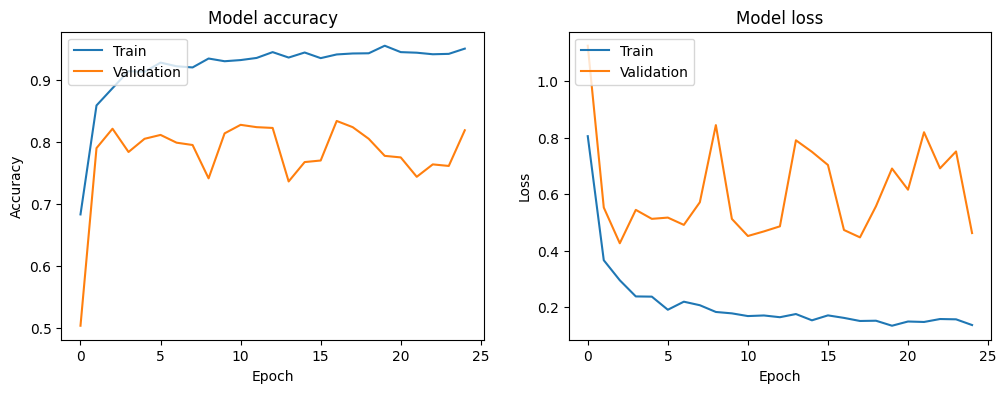

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
# Print final training and validation accuracy
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

In [25]:
from sklearn.metrics import classification_report, confusion_matrix# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/WCE_Data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Calculate overall accuracy
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Print class-wise accuracy
for i, class_name in enumerate(class_labels):
    class_correct = np.sum((y_pred == i) & (y_true == i))
    class_total = np.sum(y_true == i)
    class_accuracy = class_correct / class_total
    print(f"{class_name} Accuracy: {class_accuracy:.4f}")

Found 800 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step
Classification Report:
                      precision    recall  f1-score   support

            0_normal       0.89      1.00      0.94       200
1_ulcerative_colitis       0.81      0.54      0.65       200
            2_polyps       0.63      0.78      0.69       200
       3_esophagitis       0.98      0.96      0.97       200

            accuracy                           0.82       800
           macro avg       0.83      0.82      0.81       800
        weighted avg       0.83      0.82      0.81       800


Confusion Matrix:
[[200   0   0   0]
 [  6 108  85   1]
 [ 18  25 155   2]
 [  1   0   7 192]]

Overall Accuracy: 0.8187
0_normal Accuracy: 1.0000
1_ulcerative_colitis Accuracy: 0.5400
2_polyps Accuracy: 0.7750
3_esophagitis Accuracy: 0.9600


### Test the Model

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


#### Test Case 1 : Normal

In [20]:
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    return predicted_class_index

# Test_Case_1 : normal
img_path = 'datase/test/0_normal/test_normal_ (1).jpg'
predicted_class_index = predict_image_class(img_path, model)
print(f"Predicted Class Index: {predicted_class_index}")


FileNotFoundError: [Errno 2] No such file or directory: 'datase/test/0_normal/test_normal_ (1).jpg'

In [21]:
# Define your class names
class_names = ['0_normal', '1_ulcerative_colitis','2_polyps','3_esophagitis']  # Add your class names here

def get_class_name(class_index):
    return class_names[class_index]

predicted_class_name = get_class_name(predicted_class_index)
print(f"Predicted Class Name: {predicted_class_name}")


NameError: name 'predicted_class_index' is not defined

#### Test Case 2: Ulcerative Colitis

In [ ]:
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    return predicted_class_index

# Test_Case_2 : ulcerative colitis
img_path = 'datase/test/1_ulcerative_colitis/test_ulcer_ (9).jpg'
predicted_class_index = predict_image_class(img_path, model)
print(f"Predicted Class Index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted Class Index: 1


In [ ]:
# Define your class names
class_names = ['0_normal', '1_ulcerative_colitis','2_polyps','3_esophagitis']  # Add your class names here

def get_class_name(class_index):
    return class_names[class_index]

predicted_class_name = get_class_name(predicted_class_index)
print(f"Predicted Class Name: {predicted_class_name}")

Predicted Class Name: 1_ulcerative_colitis


#### Test Case 3: Polyps

In [ ]:
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    return predicted_class_index

# Test_Case_3 : polyps
img_path = 'datase/test/2_polyps/test_polyps_ (1).jpg'
predicted_class_index = predict_image_class(img_path, model)
print(f"Predicted Class Index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted Class Index: 2


In [ ]:
# Define your class names
class_names = ['0_normal', '1_ulcerative_colitis','2_polyps','3_esophagitis']  # Add your class names here

def get_class_name(class_index):
    return class_names[class_index]

predicted_class_name = get_class_name(predicted_class_index)
print(f"Predicted Class Name: {predicted_class_name}")

Predicted Class Name: 2_polyps


#### Test Case 4: Esophagitis

In [ ]:
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    return predicted_class_index

# Test_Case_4 : esophagitis
img_path = 'datase/test/3_esophagitis/test_esophagitis_ (1).jpg'
predicted_class_index = predict_image_class(img_path, model)
print(f"Predicted Class Index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Class Index: 3


In [ ]:
# Define your class names
class_names = ['0_normal', '1_ulcerative_colitis','2_polyps','3_esophagitis']  # Add your class names here

def get_class_name(class_index):
    return class_names[class_index]

predicted_class_name = get_class_name(predicted_class_index)
print(f"Predicted Class Name: {predicted_class_name}")

Predicted Class Name: 3_esophagitis


In [ ]:
import pickle
with open('face.pkl','wb') as file:
  pickle.dump(model,file)